In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("../data/data.csv")

In [3]:
df.head()

,title,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r,news
0,Ward was convicted of arson in 2006. He was gi...,0.123,0.627,0.058,-0.151,26,262,0.725,0.380,0.048,0.251,0.148,0.173,Real
1,At vast global gatherings like the climate whi...,0.047,0.540,0.094,0.104,44,371,0.714,0.425,0.036,0.290,0.085,0.163,Real
2,had decided to release Life on Mars as a singl...,0.025,0.306,0.088,0.105,31,212,0.726,0.283,0.053,0.350,0.190,0.124,Real
3,In a land of the grammar is king. I should kno...,0.025,0.460,0.092,0.214,26,241,0.689,0.403,0.032,0.262,0.125,0.177,Real
4,In came under fire for suggesting that half of...,0.092,0.702,0.103,0.039,29,450,0.716,0.431,0.063,0.256,0.096,0.153,Real


In [4]:
df[df["news"] == "Real" ]["neu_score"].mean(),df[df["news"] == "Fake" ]["neu_score"].mean()

(0.6267532786885246, 0.5534238969985239)

In [5]:
df[df["news"] == "Real" ]["compound_score"].mean(),df[df["news"] == "Fake" ]["compound_score"].mean()

(0.0908673155737705, 0.001072330654420207)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21954 entries, 0 to 21953
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            21954 non-null  object 
 1   neg_score        21954 non-null  float64
 2   neu_score        21954 non-null  float64
 3   pos_score        21954 non-null  float64
 4   compound_score   21954 non-null  float64
 5   n_sentences      21954 non-null  int64  
 6   n_tokens         21954 non-null  int64  
 7   unique_tokens_r  21954 non-null  float64
 8   nouns_r          21954 non-null  float64
 9   proper_nouns_r   21954 non-null  float64
 10  verbs_r          21954 non-null  float64
 11  adverbs_r        21954 non-null  float64
 12  adjectives_r     21954 non-null  float64
 13  news             21954 non-null  object 
dtypes: float64(10), int64(2), object(2)
memory usage: 2.3+ MB


In [7]:
df.describe()

,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r
count,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000
mean,0.070169,0.586024,0.084192,0.040992,23.024734,279.121299,0.776901,0.388735,0.110228,0.268513,0.090306,0.142207
std,0.056102,0.158847,0.054276,0.241192,26.933824,269.267979,0.111943,0.078509,0.113204,0.072139,0.047133,0.052852
min,0.000000,0.000000,0.000000,-0.998000,1.000000,1.000000,0.099000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036000,0.508000,0.055000,-0.087000,7.000000,102.000000,0.705000,0.354000,0.051000,0.236000,0.065000,0.118000
50%,0.061000,0.600000,0.078000,0.049500,16.000000,223.000000,0.772000,0.394000,0.085000,0.269000,0.088000,0.144000
75%,0.092000,0.685000,0.105000,0.181000,29.000000,370.000000,0.847000,0.432000,0.130000,0.302000,0.113000,0.169000
max,1.000000,0.979000,1.000000,1.000000,735.000000,3970.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'neg_score'}>,
        <Axes: title={'center': 'neu_score'}>,
        <Axes: title={'center': 'pos_score'}>],
       [<Axes: title={'center': 'compound_score'}>,
        <Axes: title={'center': 'n_sentences'}>,
        <Axes: title={'center': 'n_tokens'}>],
       [<Axes: title={'center': 'unique_tokens_r'}>,
        <Axes: title={'center': 'nouns_r'}>,
        <Axes: title={'center': 'proper_nouns_r'}>],
       [<Axes: title={'center': 'verbs_r'}>,
        <Axes: title={'center': 'adverbs_r'}>,
        <Axes: title={'center': 'adjectives_r'}>]], dtype=object)

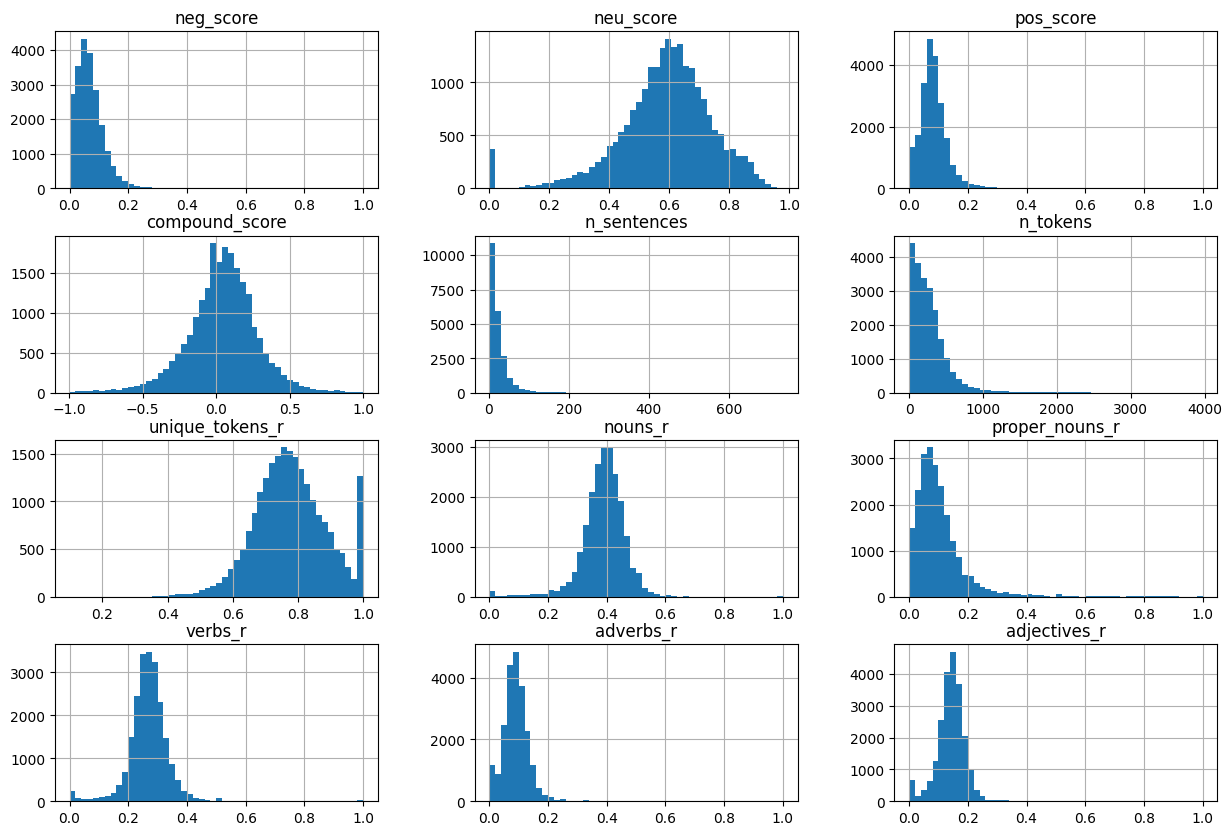

In [8]:
df.hist(figsize=(15,10), bins=50)

In [9]:
news = df.drop("title",axis=1)

In [10]:
news["news"] = news["news"].map({"Real":1,"Fake":0})

In [11]:
corr_matrix = news.corr()

In [12]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r,news
neg_score,1.000000,0.167105,-0.206025,-0.703640,-0.020132,-0.024224,0.001545,0.012121,0.019880,0.018657,-0.073654,-0.020470,-0.151705
neu_score,0.167105,1.000000,0.208899,0.049991,-0.073998,0.096807,-0.084598,0.150082,-0.222610,0.064789,0.001457,0.164179,0.229400
pos_score,-0.206025,0.208899,1.000000,0.575908,-0.004591,-0.012029,0.068866,-0.149924,-0.002399,0.033507,0.053521,0.134353,0.021174
compound_score,-0.703640,0.049991,0.575908,1.000000,0.006604,0.021825,-0.012858,-0.081749,-0.001913,-0.027662,0.080033,0.091950,0.185005
n_sentences,-0.020132,-0.073998,-0.004591,0.006604,1.000000,0.896480,-0.535364,0.019036,-0.154095,0.054200,0.120724,0.120185,0.053803
n_tokens,-0.024224,0.096807,-0.012029,0.021825,0.896480,1.000000,-0.619458,0.096198,-0.197741,0.019731,0.083146,0.179565,0.173877
unique_tokens_r,0.001545,-0.084598,0.068866,-0.012858,-0.535364,-0.619458,1.000000,-0.094671,0.019624,0.058663,0.063057,-0.037683,-0.174170
nouns_r,0.012121,0.150082,-0.149924,-0.081749,0.019036,0.096198,-0.094671,1.000000,-0.522897,-0.150907,-0.253231,0.066421,0.170739
proper_nouns_r,0.019880,-0.222610,-0.002399,-0.001913,-0.154095,-0.197741,0.019624,-0.522897,1.000000,-0.480265,-0.324356,-0.420416,-0.229022
verbs_r,0.018657,0.064789,0.033507,-0.027662,0.054200,0.019731,0.058663,-0.150907,-0.480265,1.000000,0.084236,-0.187165,0.042488


In [13]:
corr_matrix["news"].sort_values(ascending=False)

news               1.000000
neu_score          0.229400
compound_score     0.185005
n_tokens           0.173877
nouns_r            0.170739
adjectives_r       0.101133
adverbs_r          0.087188
n_sentences        0.053803
verbs_r            0.042488
pos_score          0.021174
neg_score         -0.151705
unique_tokens_r   -0.174170
proper_nouns_r    -0.229022
Name: news, dtype: float64

In [14]:
news["article_tone"] = news["compound_score"] + news["neu_score"]
news["mean_sentence_length"] = news["n_tokens"] / news["n_sentences"]


In [15]:
corr_matrix = news.corr()

In [16]:
corr_matrix["news"].sort_values(ascending=False)

news                    1.000000
article_tone            0.274451
neu_score               0.229400
mean_sentence_length    0.218395
compound_score          0.185005
n_tokens                0.173877
nouns_r                 0.170739
adjectives_r            0.101133
adverbs_r               0.087188
n_sentences             0.053803
verbs_r                 0.042488
pos_score               0.021174
neg_score              -0.151705
unique_tokens_r        -0.174170
proper_nouns_r         -0.229022
Name: news, dtype: float64

In [17]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r,news,article_tone,mean_sentence_length
neg_score,1.000000,0.167105,-0.206025,-0.703640,-0.020132,-0.024224,0.001545,0.012121,0.019880,0.018657,-0.073654,-0.020470,-0.151705,-0.484727,-0.011732
neu_score,0.167105,1.000000,0.208899,0.049991,-0.073998,0.096807,-0.084598,0.150082,-0.222610,0.064789,0.001457,0.164179,0.229400,0.578634,0.364898
pos_score,-0.206025,0.208899,1.000000,0.575908,-0.004591,-0.012029,0.068866,-0.149924,-0.002399,0.033507,0.053521,0.134353,0.021174,0.582640,-0.006282
compound_score,-0.703640,0.049991,0.575908,1.000000,0.006604,0.021825,-0.012858,-0.081749,-0.001913,-0.027662,0.080033,0.091950,0.185005,0.843494,0.050897
n_sentences,-0.020132,-0.073998,-0.004591,0.006604,1.000000,0.896480,-0.535364,0.019036,-0.154095,0.054200,0.120724,0.120185,0.053803,-0.034404,-0.155917
n_tokens,-0.024224,0.096807,-0.012029,0.021825,0.896480,1.000000,-0.619458,0.096198,-0.197741,0.019731,0.083146,0.179565,0.173877,0.069886,0.042136
unique_tokens_r,0.001545,-0.084598,0.068866,-0.012858,-0.535364,-0.619458,1.000000,-0.094671,0.019624,0.058663,0.063057,-0.037683,-0.174170,-0.055998,-0.131225
nouns_r,0.012121,0.150082,-0.149924,-0.081749,0.019036,0.096198,-0.094671,1.000000,-0.522897,-0.150907,-0.253231,0.066421,0.170739,0.013959,0.111138
proper_nouns_r,0.019880,-0.222610,-0.002399,-0.001913,-0.154095,-0.197741,0.019624,-0.522897,1.000000,-0.480265,-0.324356,-0.420416,-0.229022,-0.121284,-0.038202
verbs_r,0.018657,0.064789,0.033507,-0.027662,0.054200,0.019731,0.058663,-0.150907,-0.480265,1.000000,0.084236,-0.187165,0.042488,0.012255,-0.035926


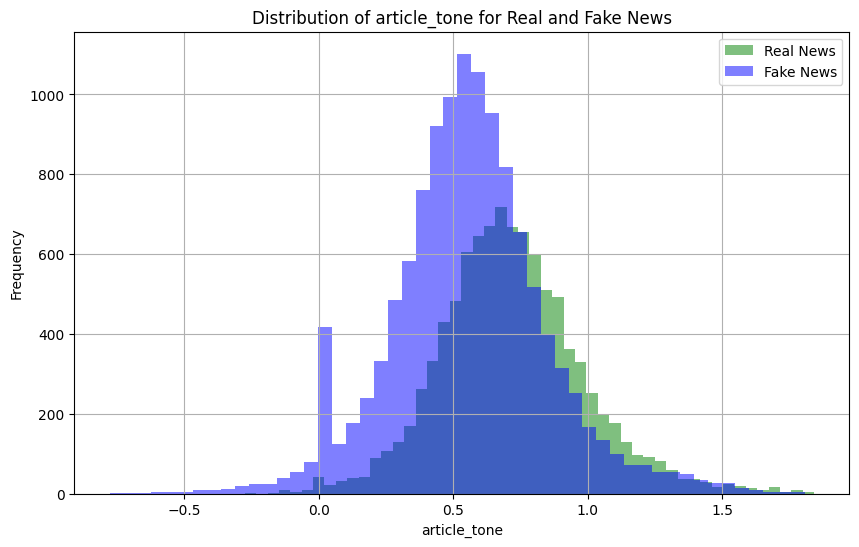

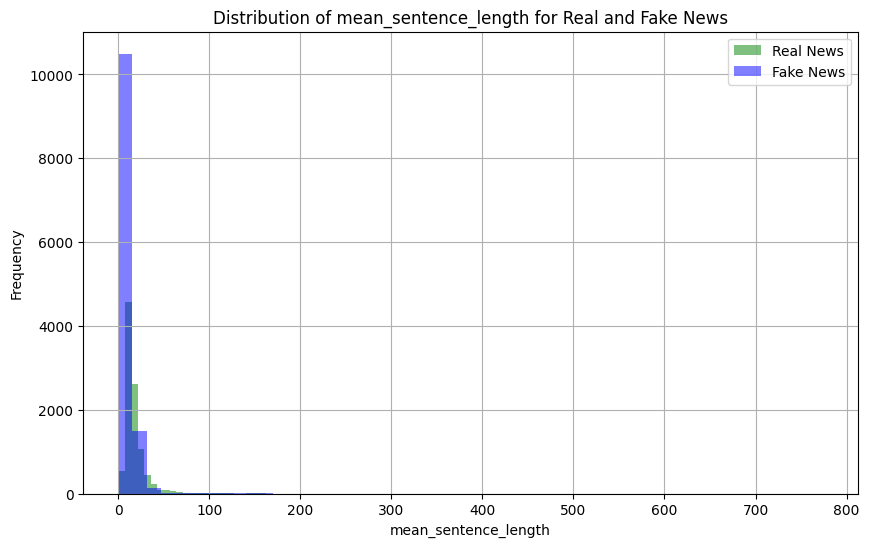

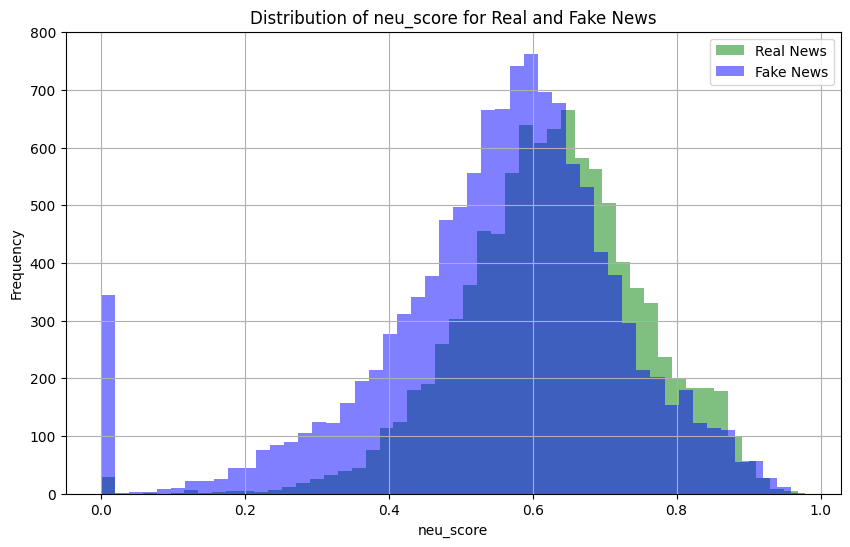

In [18]:
plot_data = ["article_tone", "mean_sentence_length", "neu_score"]

for data in plot_data:
    plt.figure(figsize=(10, 6))
    
    # Histogram dla real news
    news[news['news'] == 1][data].hist(alpha=0.5, bins=50, label='Real News', color='green')
    
    # Histogram dla fake news
    news[news['news'] == 0][data].hist(alpha=0.5, bins=50, label='Fake News', color='blue')
    
    plt.title(f'Distribution of {data} for Real and Fake News')
    plt.xlabel(data)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [19]:
news_labels = news["news"]

news = news.drop("news",axis=1)

In [204]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class EstimatorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True, with_std=True, epsilon=1e-8):
        self.with_mean = with_mean
        self.with_std = with_std
        self.epsilon = epsilon

    def fit(self, X, y=None):
        # Sprawdź, czy X jest prawidłową tablicą
        X = check_array(X, accept_sparse=False, dtype='numeric', force_all_finite=True)

        self.n_features_in_ = X.shape[1]

        if self.with_mean:
            self.mean_ = np.mean(X, axis=0)
        else:
            self.mean_ = np.zeros(X.shape[1])

        if self.with_std:
            self.scale_ = np.std(X, axis=0) + self.epsilon
        else:
            self.scale_ = np.ones(X.shape[1])

        return self

    def transform(self, X):
        # Sprawdź, czy transformer został dopasowany
        check_is_fitted(self, ['mean_', 'scale_'])

        # Sprawdź, czy X jest prawidłową tablicą
        X = check_array(X, accept_sparse=False, dtype='numeric', force_all_finite=True)

        # Sprawdź, czy X ma tę samą liczbę cech co podczas dopasowania
        if X.shape[1] != self.n_features_in_:
            raise ValueError(f"X ma {X.shape[1]} cech, ale {self.__class__.__name__} "
                             f"został dopasowany z {self.n_features_in_} cechami.")

        X_transformed = X.copy()

        if self.with_mean:
            X_transformed -= self.mean_

        if self.with_std:
            X_transformed /= self.scale_

        return X_transformed

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news, news_labels, test_size=0.2, random_state=42)

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


pipeline = Pipeline([
    ('MinMax_scaler', MinMaxScaler()),
    ('estimator', Estimator_Transformer())
])

news_prepared = pipeline.fit_transform(X_train)

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier
import xgboost as xgb

def EvaluateModels(models):
    for model in models:
        scores = cross_val_score(model, news_prepared, y_train, scoring='roc_auc', cv=3)
        print(f'{model} Accuracy: {scores.mean()}')    

In [210]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), SGDClassifier(), GaussianNB(), ExtraTreesClassifier(),xgb.XGBClassifier(random_state=42)]

EvaluateModels(models)

LogisticRegression() Accuracy: 0.7929486500655841
DecisionTreeClassifier() Accuracy: 0.7067427330447812
RandomForestClassifier() Accuracy: 0.8707050315212839
SVC() Accuracy: 0.8701519849725742
SGDClassifier() Accuracy: 0.7828805637916986
GaussianNB() Accuracy: 0.7650606305302431
ExtraTreesClassifier() Accuracy: 0.8696160196657057
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_es

In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

def create_stacking_ensemble(base_models, X, y):
    meta_model = LogisticRegression()
    stacking = StackingClassifier(
        estimators=[(f'model_{i}', model) for i, model in enumerate(base_models)],
        final_estimator=meta_model,
        cv=5
    )
    scores = cross_val_score(stacking, X, y, cv=5, scoring='accuracy')
    return stacking, scores.mean()

base_models = [
    LogisticRegression(),
    SVC(probability=True),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
]

best_ensemble, best_score = create_stacking_ensemble(base_models, news_prepared, y_train)
print(f"Best Stacking Ensemble Accuracy: {best_score}")

Best Stacking Ensemble Accuracy: 0.795992382993982


In [144]:
best_ensemble

StackingClassifier(cv=5,
                   estimators=[('model_0', LogisticRegression()),
                               ('model_1', SVC(probability=True)),
                               ('model_2', KNeighborsClassifier()),
                               ('model_3', GaussianNB()),
                               ('model_4', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [32]:
def display_scores(scores):
  print("Scores:",scores)
  print("Mean",scores.mean())
  print("STD:",scores.std())

In [57]:
from sklearn.model_selection import RandomizedSearchCV

def RandomGridSearch(model,params,n_iter,cv):
    grid_search = RandomizedSearchCV(model, param_distributions=params, n_iter=n_iter, scoring='roc_auc', n_jobs=-1, cv=cv, verbose=1, random_state=42 )
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validated score: {:.2f}".format(grid_search.best_score_))
    return grid_search.best_estimator_

In [295]:
param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
model = RandomForestClassifier()

best_model = RandomGridSearch(model,param_grid, 10, 5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy', 'ccp_alpha': 0.001}
Best cross-validated score: 0.85


In [296]:
final_model = best_model
final_model.fit(news_prepared,y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='log2')

In [297]:
cross_val_score(final_model, news_prepared, y_train, scoring='roc_auc', cv=3).mean()

0.8564440970672127

In [298]:
def CrossValidation(model,scoring,n_cv):
    return cross_val_score(model, news_prepared, y_train, scoring=scoring, cv=n_cv)

In [299]:
CrossValidation(final_model,'precision',3).mean()

0.7599077929568883

In [300]:
CrossValidation(final_model,'accuracy',3).mean()

0.7750956158641955

In [301]:
CrossValidation(final_model,'f1',3).mean()

0.7405765856329279

In [302]:
from sklearn.metrics import roc_curve
test_preapred = pipeline.transform(X_test)
y_scores = cross_val_predict(final_model, test_prepared ,y_test, cv=3,method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

In [303]:
def plot_roc_curve(fpr, tpr, title=None):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  plt.ylabel("TPR (True Positive Ratio - Recall)")
  plt.xlabel("FPR (Flase Positive Ratio - Sensitivity)")
  plt.title(title)

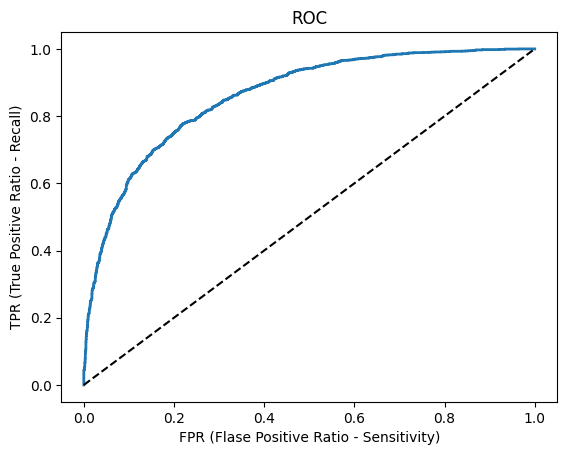

In [304]:
plot_roc_curve(fpr,tpr,title="ROC")

In [315]:
from sklearn.model_selection import cross_val_predict

y_pred_prob = final_model.predict_proba(test_prepared)[:, 1] 

predictions = (y_pred_prob >= 0.5).astype(int)

In [316]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, predictions) 

In [317]:
roc_auc

0.7706642535125914

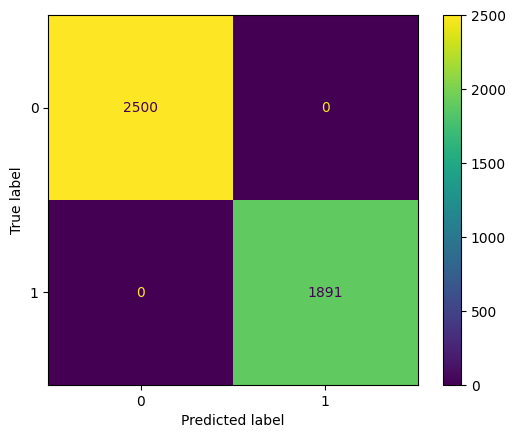

In [318]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_model, test_prepared, predictions)

In [319]:
probabilities = final_model.predict_proba(X_test)[:, 1]

/home/omen/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [320]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Generuj różne progi
thresholds = np.arange(0, 1.01, 0.01)

# Oblicz precyzję, recall i F1 dla różnych progów
precisions, recalls, _ = precision_recall_curve(y_test, probabilities)
f1_scores = [f1_score(y_test, probabilities >= threshold) for threshold in thresholds]

# Znajdź próg z najwyższym F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Najlepszy próg: {best_threshold}")

Najlepszy próg: 0.65


In [291]:
# Klasyfikacja z nowym progiem
predictions = (probabilities >= 0.6).astype(int)

In [292]:
predictions

array([1, 0, 1, ..., 1, 1, 1])

In [321]:
import joblib

joblib.dump(final_model, "predictor_test.pkl")

['predictor_test.pkl']

In [249]:
model_t = joblib.load( "../data/predictor.pkl")

In [255]:
model_t

RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)